# MACHINE LEARNING

## Final Practical

### Submitted To : Prof. Shifali Sharma
### Submitted By : Hrithik Johri (18BCS6145)


#### Importing Required Libraries

In [61]:

import numpy as np 
import pandas as pd 
from sklearn import svm
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score

In [62]:
#Loading the Dataframe
df = pd.read_csv("/content/5.csv")

In [63]:
df.head()

,X,Y,month,day,FFMC,DMC,DC,ISI,temp,RH,wind,rain,area
0,7,5,mar,fri,86.2,26.2,94.3,5.1,8.2,51,6.7,0.0,0.0
1,7,4,oct,tue,90.6,35.4,669.1,6.7,18.0,33,0.9,0.0,0.0
2,7,4,oct,sat,90.6,43.7,686.9,6.7,14.6,33,1.3,0.0,0.0
3,8,6,mar,fri,91.7,33.3,77.5,9.0,8.3,97,4.0,0.2,0.0
4,8,6,mar,sun,89.3,51.3,102.2,9.6,11.4,99,1.8,0.0,0.0


In [64]:
df.shape

(517, 13)

Checking if there are Missing Values in the Dataset

In [65]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 517 entries, 0 to 516
Data columns (total 13 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   X       517 non-null    int64  
 1   Y       517 non-null    int64  
 2   month   517 non-null    object 
 3   day     517 non-null    object 
 4   FFMC    517 non-null    float64
 5   DMC     517 non-null    float64
 6   DC      517 non-null    float64
 7   ISI     517 non-null    float64
 8   temp    517 non-null    float64
 9   RH      517 non-null    int64  
 10  wind    517 non-null    float64
 11  rain    517 non-null    float64
 12  area    517 non-null    float64
dtypes: float64(8), int64(3), object(2)
memory usage: 52.6+ KB


Thus, we come to know that there are no NULL Values in the Dataset.

In [66]:
lEncoder = LabelEncoder()
df['month'] = lEncoder.fit_transform(df['month'])
df['day'] = lEncoder.fit_transform(df['day'])

In [67]:
x = df.iloc[:,:-1]
y = df.iloc[:,-1]

In [68]:
x.head()

,X,Y,month,day,FFMC,DMC,DC,ISI,temp,RH,wind,rain
0,7,5,7,0,86.2,26.2,94.3,5.1,8.2,51,6.7,0.0
1,7,4,10,5,90.6,35.4,669.1,6.7,18.0,33,0.9,0.0
2,7,4,10,2,90.6,43.7,686.9,6.7,14.6,33,1.3,0.0
3,8,6,7,0,91.7,33.3,77.5,9.0,8.3,97,4.0,0.2
4,8,6,7,3,89.3,51.3,102.2,9.6,11.4,99,1.8,0.0


In [69]:
y.head()

0    0.0
1    0.0
2    0.0
3    0.0
4    0.0
Name: area, dtype: float64

In [70]:
df.columns

Index(['X', 'Y', 'month', 'day', 'FFMC', 'DMC', 'DC', 'ISI', 'temp', 'RH',
       'wind', 'rain', 'area'],
      dtype='object')

### Data Visualization

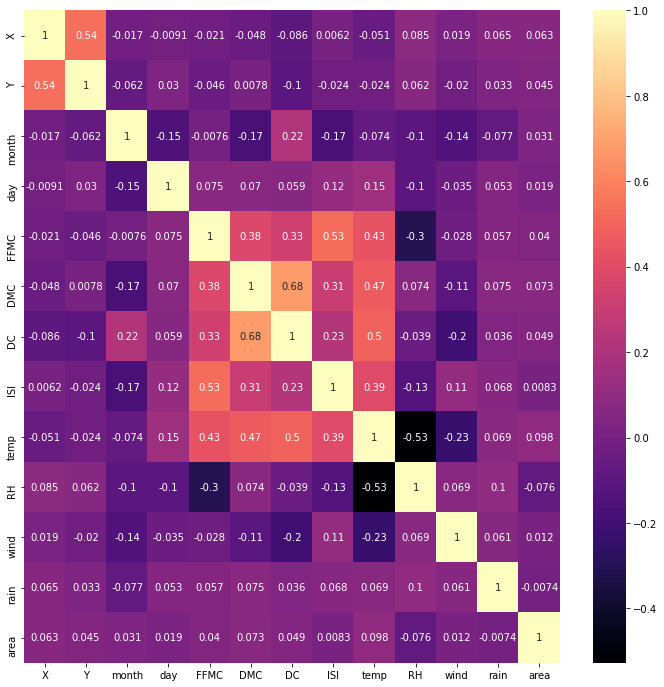

In [71]:
plt.figure(figsize=(12,12))
sns.heatmap(df.corr(), cmap="magma", annot = True)
plt.show()

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7f66dbf156a0>,
      dtype=object)

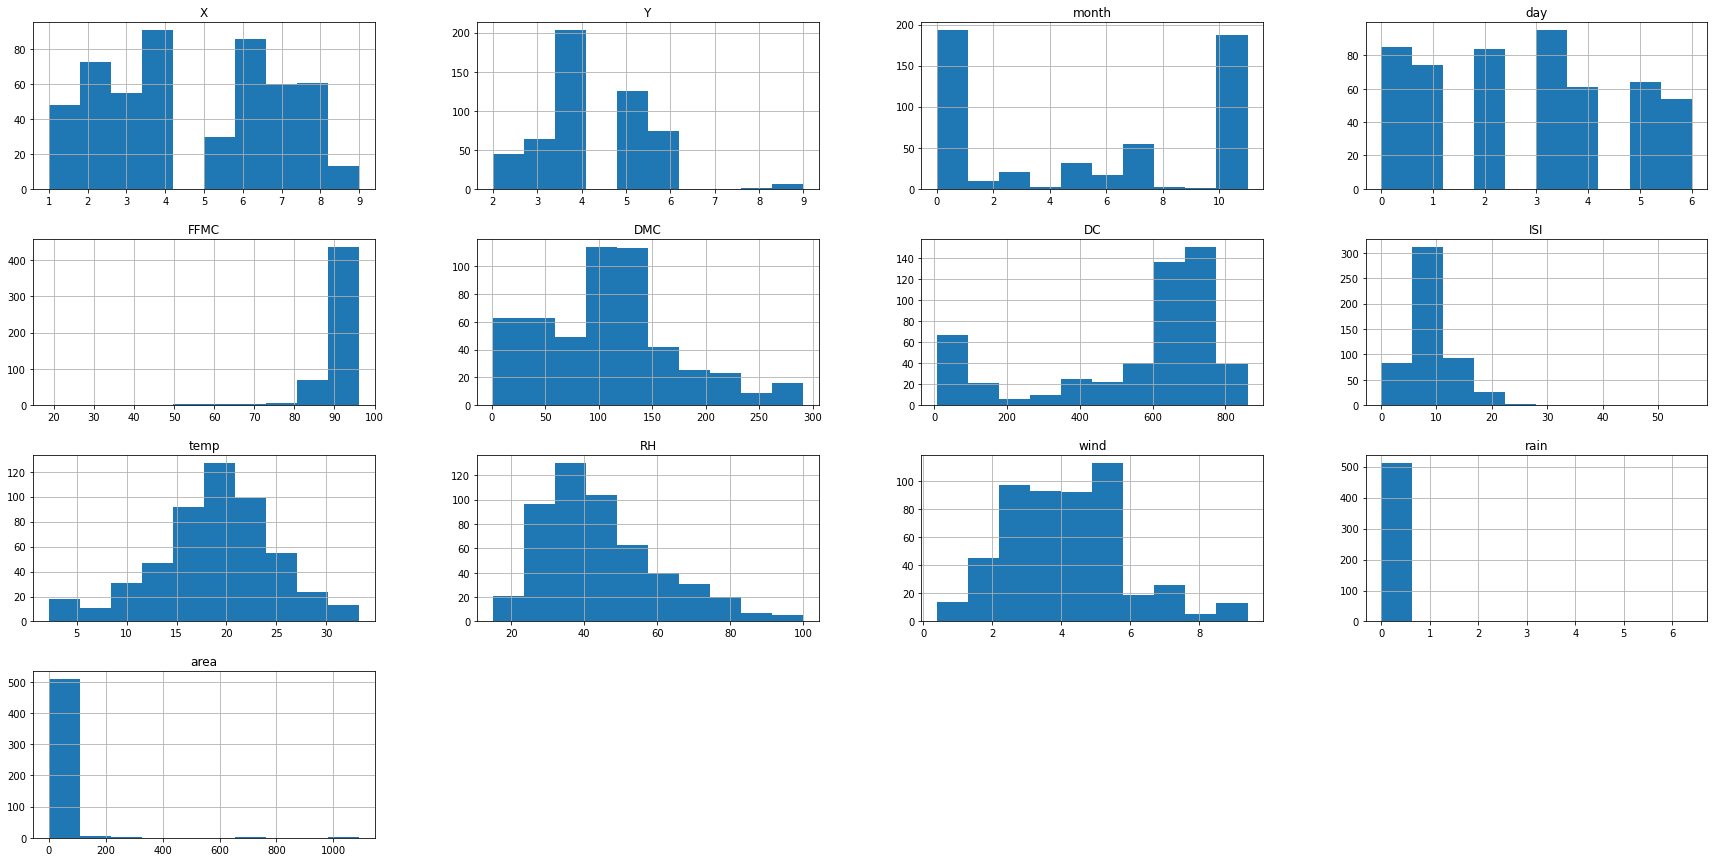

In [72]:
col = df.columns
df.hist(col, figsize=(30,15))

### Model building

Making Train- Test Split 

In [73]:
x_train, x_test, y_train, y_test = train_test_split(x,y,test_size=0.25, random_state = 50)

## Support Vector Machines

In [74]:
svm_model = svm.SVR()
svm_model.fit(x_train, y_train)

SVR(C=1.0, cache_size=200, coef0=0.0, degree=3, epsilon=0.1, gamma='scale',
    kernel='rbf', max_iter=-1, shrinking=True, tol=0.001, verbose=False)

In [75]:
predicted = svm_model.predict(x_test)

In [76]:
SVM_Mae = mean_absolute_error(y_test, predicted)
print(SVM_Mae)

SVM_Mse = mean_squared_error(y_test, predicted)
print(SVM_Mse)

SVM_r2 = r2_score(y_test, predicted)
print(SVM_r2)

9.18341418990753
657.364800950851
-0.12258650121721804


## Ridge Regression

In [77]:
from sklearn.linear_model import Ridge

In [78]:
ridge_model = Ridge()
ridge_model.fit(x_train, y_train)

Ridge(alpha=1.0, copy_X=True, fit_intercept=True, max_iter=None,
      normalize=False, random_state=None, solver='auto', tol=0.001)

In [79]:
predicted_ridge = ridge_model.predict(x_test)

In [80]:
Ridge_Mae = mean_absolute_error(y_test, predicted_ridge)
print(Ridge_Mae)

Ridge_Mse = mean_squared_error(y_test, predicted_ridge)
print(Ridge_Mse)

Ridge_r2 = r2_score(y_test, predicted_ridge)
print(Ridge_r2)

17.946939430570065
765.1346332632518
-0.30662580301334463
